12 steps to Navier–Stokes
======
***

You should have completed Steps [1](./01_Step_1.ipynb) and [2](./02_Step_2.ipynb) before continuing. This Jupyter notebook continues the presentation of the **12 steps to Navier–Stokes**, the practical module taught in the interactive CFD class of [Prof. Lorena Barba](http://lorenabarba.com). 

Step 3: Diffusion Equation in 1-D
-----
***

The one-dimensional diffusion equation is:

$$\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}$$

The first thing you should notice is that —unlike the previous two simple equations we have studied— this equation has a second-order derivative. We first need to learn what to do with it!

### Discretizing $\frac{\partial ^2 u}{\partial x^2}$

The second-order derivative can be represented geometrically as the line tangent to the curve given by the first derivative.  We will discretize the second-order derivative with a Central Difference scheme: a combination of Forward Difference and Backward Difference of the first derivative.  Consider the Taylor expansion of $u_{i+1}$ and $u_{i-1}$ around $u_i$:

$u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

$u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

If we add these two expansions, you can see that the odd-numbered derivative terms will cancel each other out.  If we neglect any terms of $O(\Delta x^4)$ or higher (and really, those are very small), then we can rearrange the sum of these two expansions to solve for our second-derivative.  


$u_{i+1} + u_{i-1} = 2u_i+\Delta x^2 \frac{\partial ^2 u}{\partial x^2}\bigg|_i + O(\Delta x^4)$

Then rearrange to solve for $\frac{\partial ^2 u}{\partial x^2}\bigg|_i$ and the result is:

$$\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O(\Delta x^2)$$


### Back to Step 3

We can now write the discretized version of the diffusion equation in 1D:

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}$$

As before, we notice that once we have an initial condition, the only unknown is $u_{i}^{n+1}$, so we re-arrange the equation solving for our unknown:

$$u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$$

The above discrete equation allows us to write a program to advance a solution in time. But we need an initial condition. Let's continue using our favorite: the hat function. So, at $t=0$, $u=2$ in the interval $0.5\le x\le 1$ and $u=1$ everywhere else. We are ready to number-crunch!

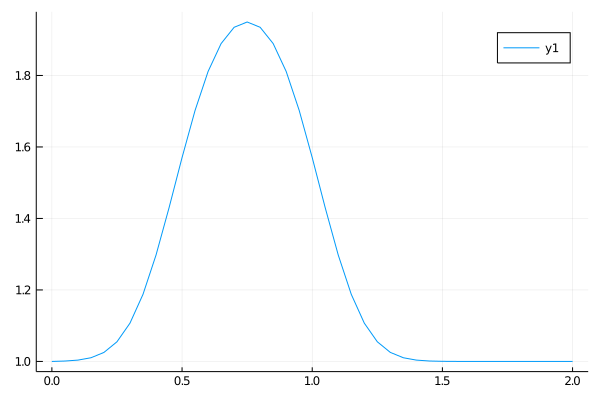

In [1]:
using Plots

nx = 41
Δx = 2 / (nx - 1)
x  = range(0, stop=Δx*(nx-1), length=nx)

nt = 20        # the number of timesteps we want to calculate
nu = 0.3       # the value of viscosity
σ  = .2        # σ is a parameter, we'll learn more about it later
Δt = σ*Δx^2/nu # dt is defined using sigma ... more later!
t  = range(0, stop=Δt*nt, length=nt)

u₀ = ones(nx)           # an rray with nx elements all equal to 1.
u₀[0.5 .≤ x .≤ 1] .= 2  # setting u = 2 between 0.5 and 1 as per our I.C.s

uⁿ⁺¹ = copy(u₀) # our placeholder array, un, to advance the solution in time

for n ∈ 1:nt  # iterate through time
    uⁿ = copy(uⁿ⁺¹) # copy the existing values of uⁿ⁺¹ into uⁿ
    for i ∈ 2:nx-1
        uⁿ⁺¹[i] = uⁿ[i] + nu * Δt/Δx^2 * (uⁿ[i+1] - 2 * uⁿ[i] + uⁿ[i-1])
    end
end

u = uⁿ⁺¹

plot(x, u)

## Learn More

For a careful walk-through of the discretization of the diffusion equation with finite differences (and all steps from 1 to 4), watch **Video Lesson [4](https://youtube.com/watch?v=y2WaK7_iMRI)** by Prof. Barba on YouTube.